# EDA assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

***Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows***.

(***Show the shape and column names as well.***)


In [3]:
df = pd.read_csv('/content/BIKE DETAILS.csv')

In [4]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [5]:
# To display its first 10 rows
df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [6]:
df.shape

(1061, 7)

In [7]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

***Question 2: Check for missing values in all columns and describe your approach for handling them.***


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [9]:
# To check for missing values in all columns
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Approach for handling the missing values:

1) Drop the values if missing values are smaller in number
2) If dataset with larger missing values then we should go for imputation techniques.

If the distribution of data is normal and there are no outliers present, we can go for mean imputation. Otherwise, we prefer median imputation.

In [16]:
# First we will check if there are strong outliers present or not using a boxplot.

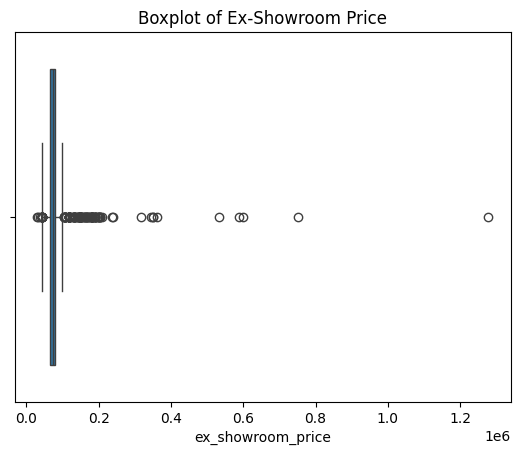

In [15]:
sns.boxplot(x=df['ex_showroom_price'])
plt.title("Boxplot of Ex-Showroom Price")
plt.show()

In [ ]:
# Through graph we can compute that there are strong outliers present
# so in that case we will go for median imputation for handling the missing values.

In [17]:
median_price = df['ex_showroom_price'].median()
df['ex_showroom_price'].fillna(median_price, inplace=True)

In [11]:
# Here in the dataset we can see naN values are replace by median value.
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,72752.5
1,Honda Dio,45000,2017,Individual,1st owner,5650,72752.5
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,72752.5


In [18]:
# To re-check if there are missing values in the data
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


***Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.***


<Figure size 1000x600 with 0 Axes>

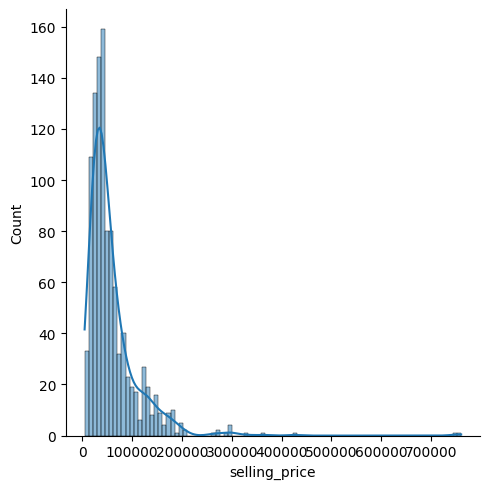

In [33]:
plt.figure(figsize=(10,6))
sns.displot(df['selling_price'], kde = True)

 Overall trend
- The histogram of selling prices shows a right-skewed distribution, where most of the selling prices are clustered toward the lower end with fewer bikes being sold at higher prices.

- This trend suggests that mid-range bikes are more common in the dataset, while premium or high-end bikes are less frequent. The presence of a long tail on the right side indicates that although high-priced bikes exist, they are relatively rare.

***Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.***

In [57]:
# First we will grouby seller type and average selling price
avg_selling_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

In [58]:
avg_selling_price

,seller_type,selling_price
0,Dealer,46666.666667
1,Individual,59711.923223


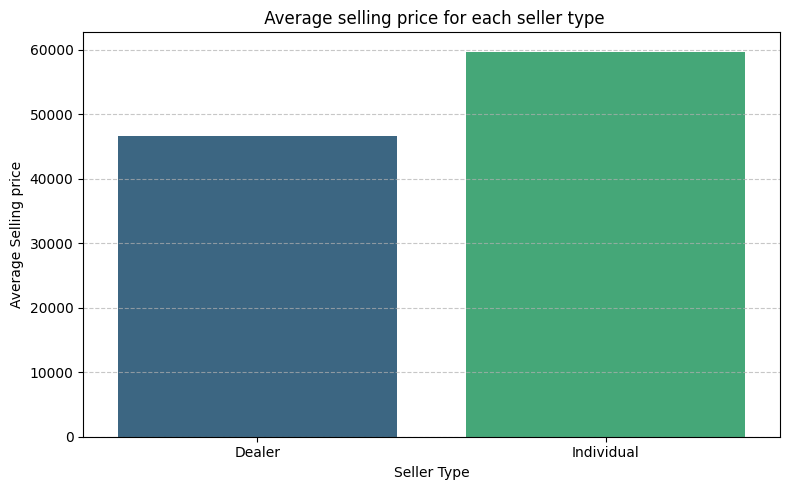

In [59]:
# plotting a bar plot to visualize the avg_selling price for each seller_type
plt.figure(figsize=(8, 5))
sns.barplot(x = 'seller_type', y = 'selling_price', data = avg_selling_price, palette="viridis")

# Giving a title to the plot
plt.title(" Average selling price for each seller type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [62]:
df.groupby('seller_type')['year'].mean()

,year
seller_type,
Dealer,2011.000000
Individual,2013.883412


In [63]:
df.groupby('seller_type')['km_driven'].mean()

,km_driven
seller_type,
Dealer,35258.833333
Individual,34354.720379


Observation:
- From the bar plot, we observe that the average selling price is highest for "Individual" sellers.
- Through all the data, we can observe that individual sellers use latest model of bikes and by observing the mean of km_driven we can say they sell less used bikes.

**Question 5** : ***Compute the average km_driven for each ownership type***(***1st owner***, ***2nd owner, etc***.), ***and present the result as a bar plot***.

In [64]:
avg_km_driven = df.groupby('owner')['km_driven'].mean().reset_index()

In [65]:
avg_km_driven

,owner,km_driven
0,1st owner,32816.583333
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,311500.000000


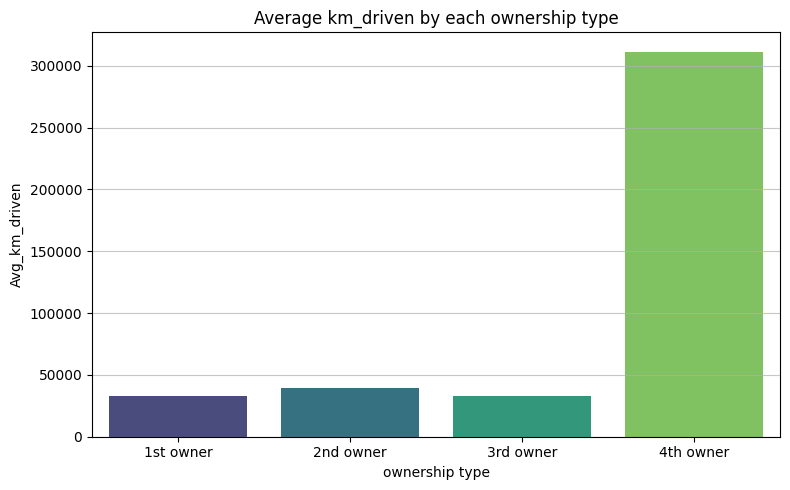

In [68]:
# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data= avg_km_driven, palette='viridis')

# Title
plt.title('Average km_driven by each ownership type')
plt.xlabel('ownership type')
plt.ylabel('Avg_km_driven')
plt.grid(axis='y',alpha=0.7 )
plt.tight_layout()
plt.show()

**Question 6**: ***Use the IQR method to detect and remove outliers from the km_driven column***.
***Show before-and-after summary statistics***.


In [69]:
# Before removing outliers >> summary statistics
df['km_driven'].describe()

,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000


In [72]:
# Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
no_outliers = df[(df['km_driven']>=lower_bound) & (df['km_driven']<=upper_bound)]

# Count and percentage of outliers
print(f"Number of outliers: {len(no_outliers)}")
print(f"Percentage of outliers: {100 * len(no_outliers) / len(df['km_driven']):.2f}%")


Number of outliers: 1022
Percentage of outliers: 96.32%


In [74]:
# Summary statistics after removing outliers
no_outliers['km_driven'].describe()

,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


**Question 7: Create a scatter plot of year vs** . **selling_price to explore the**
**relationship between a bike's age and its price.**


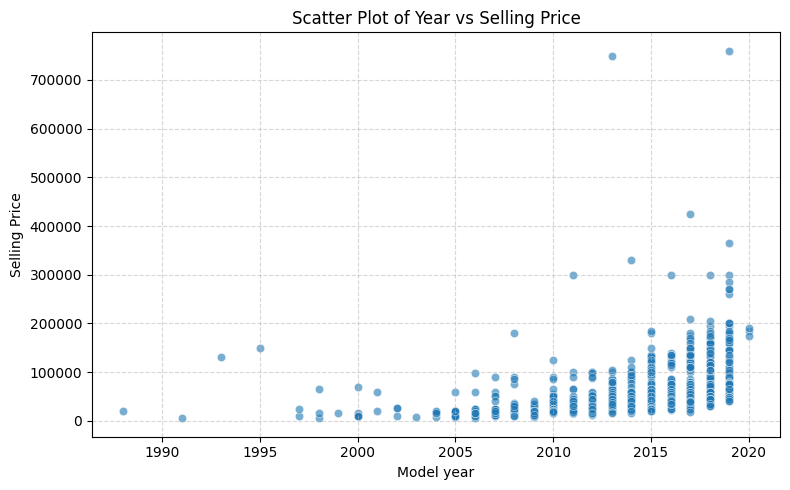

In [78]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6)

plt.title("Scatter Plot of Year vs Selling Price")
plt.xlabel("Model year")
plt.ylabel("Selling Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Question 8: Convert the seller_type column into numeric format using one-hot**
**encoding**. **Display the first 5 rows of the resulting DataFrame**.  

In [83]:
encoded_df = pd.get_dummies(df, columns=['seller_type'], prefix='seller', dtype=int)

In [84]:
encoded_df.head()

,name,selling_price,year,owner,km_driven,ex_showroom_price,avg_selling_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,NaN,0,1
1,Honda Dio,45000,2017,1st owner,5650,72752.5,NaN,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,NaN,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,NaN,0,1
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,NaN,0,1


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns**.
**What correlations stand out the most?**


In [86]:
# selecting only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

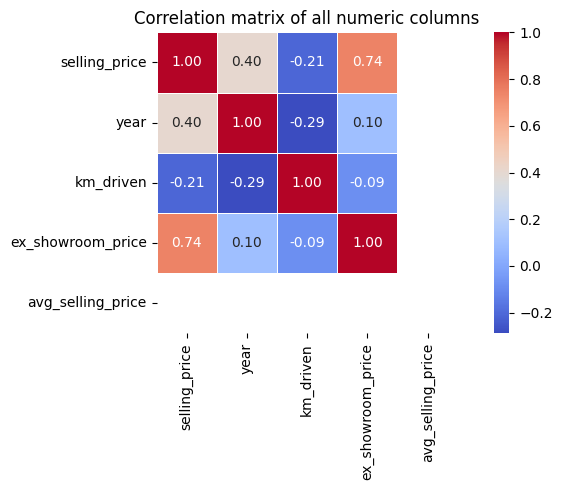

In [89]:
corr_matrix = numeric_df.corr()

# plot the heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title('Correlation matrix of all numeric columns')
plt.tight_layout()
plt.show()

- The heatmap shows that the strongest positive correlation is between selling_price and ex_showroom_price (0.74), indicating that bikes with higher original prices tend to sell for more.

**Question 10: Summarize your findings in a brief report:**

● **What are the most important factors affecting a bike's** **selling price?**

● **Mention any data cleaning or feature engineering you performed.**




- Most important factors affecting a bike's selling price are:

  -   Model year: latest year model of the bike are more likely to be sold out than older model bikes.
  - km_driven: Insights: More kilometers driven usually lowers the selling price, but this effect is relatively minor compared to age and original cost.
  - Ex showroom price: Insight: Bikes that were more expensive when new generally maintain higher resale value.

- Data cleaning or feature engineering I performed:

  - Handling missing values: ex_showroom_price had 435 missing values.
  Using median imputation technique because there were strong outliers present.
  - Remove outliers: Applied IQR method to remove outlier from km_driven.
  - One-hot encoding: Converted the categorical column seller_type into numeric format using one-hot encoding.

NOTE: The analysis shows that a bike’s original price, age, and usage (km driven) are key drivers of its selling price.